In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_path = "C:\\Users\Otgon\diveintocode-ml\mtfuji_data.csv"
np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
# x, lat, lng, elevation, distance
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Problem 1
visualize data

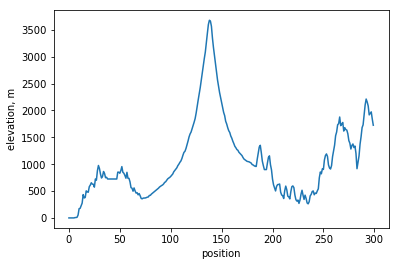

In [3]:
plt.plot(fuji[:,0],fuji[:,3])
plt.xlabel("position")
plt.ylabel("elevation, m")
plt.show()

# Problem 2
Create a function to calculate the slope of a point

In [4]:
# compute for elevation data
def compute_fuji_slope(data):
    slope = (data[1:,3]-data[:-1,3])/(data[1:,0]-data[:-1,0])
    return slope
slope_fuji = compute_fuji_slope(fuji)
print(slope_fuji.shape)

(299,)


In [5]:
# compute for given position number
# when point number is given function computes elevation diff. relative to the down point
# elevation - point and altitude of the fuji data
def compute_slope(x,elevation):
# calculate the change in elevation and postion according to the point given
    y_change = elevation[x,1] -  elevation[x-1,1]
    x_change = elevation[x,0] -  elevation[x-1,0]
    slope = y_change/x_change
    return slope
compute_slope(7,fuji[:,(0,3)])

0.58999999999999986

# Problem 3
Create a function to calculate the destination

In [13]:
def compute_dest (current,slope,alpha):
    dest = current-slope*alpha
    if(dest<0): return 0
    else: return np.round(dest)
alpha = 0.2
print(compute_dest(7,compute_slope(7,fuji[:,(0,3)]),alpha))

7.0


# Problem 4
Creating a function to go down the mountain

In [14]:
def going_down_fuji(position,alpha):
    locs = [fuji[position,3]]
    # number of locs would be between two points for example if alpha=0.2 then there will be 5 locations between two x-points
    per_pos_locs = int(1/alpha)
    next_loc = fuji[position,3]
    # it should iterate until position is 0
    while position > 0:
        # slope will be same in the given point locations
        slope = compute_slope(position,fuji[:,(0,3)])
        for i in range(per_pos_locs):
            next_loc = compute_dest(next_loc,alpha,slope)
            locs.append(next_loc)
        position -= 1
    return locs
alpha = 0.2
path1 = going_down_fuji(136,alpha)
print("Lenght of the locations list:",len(path1))
print("Locations going down:",path1)

Lenght of the locations list: 681
Locations going down: [3434.5900000000001, 3401.0, 3367.0, 3333.0, 3299.0, 3265.0, 3229.0, 3193.0, 3157.0, 3121.0, 3085.0, 3061.0, 3037.0, 3013.0, 2989.0, 2965.0, 2937.0, 2909.0, 2881.0, 2853.0, 2825.0, 2801.0, 2777.0, 2753.0, 2729.0, 2705.0, 2677.0, 2649.0, 2621.0, 2593.0, 2565.0, 2538.0, 2511.0, 2484.0, 2457.0, 2430.0, 2406.0, 2382.0, 2358.0, 2334.0, 2310.0, 2288.0, 2266.0, 2244.0, 2222.0, 2200.0, 2176.0, 2152.0, 2128.0, 2104.0, 2080.0, 2055.0, 2030.0, 2005.0, 1980.0, 1955.0, 1934.0, 1913.0, 1892.0, 1871.0, 1850.0, 1836.0, 1822.0, 1808.0, 1794.0, 1780.0, 1769.0, 1758.0, 1747.0, 1736.0, 1725.0, 1712.0, 1699.0, 1686.0, 1673.0, 1660.0, 1648.0, 1636.0, 1624.0, 1612.0, 1600.0, 1593.0, 1586.0, 1579.0, 1572.0, 1565.0, 1554.0, 1543.0, 1532.0, 1521.0, 1510.0, 1495.0, 1480.0, 1465.0, 1450.0, 1435.0, 1421.0, 1407.0, 1393.0, 1379.0, 1365.0, 1351.0, 1337.0, 1323.0, 1309.0, 1295.0, 1284.0, 1273.0, 1262.0, 1251.0, 1240.0, 1236.0, 1232.0, 1228.0, 1224.0, 1220.0, 120

# Problem 5
Visualization of the descent process

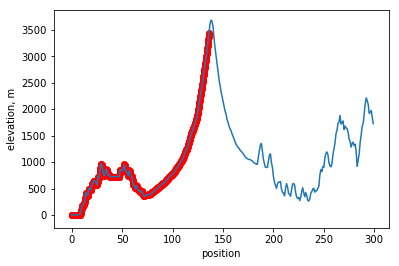

In [15]:
# Display points as dots
plt.plot(fuji[:,0],fuji[:,3])
plt.xlabel("position")
plt.ylabel("elevation, m")
# in reverse order since path1 is in order of altitude of going down
plt.scatter(np.arange(136+0.1,0,-alpha),path1,color="red")
plt.show()

In [55]:
elev1 = np.concatenate((np.reshape(np.arange(0,681,1),(681,1)),np.reshape(path1[::-1],(681,1))),axis=1)
slope1 = []
for i in range(1,len(elev1)):
    slope1.append(compute_slope(i,elev1))

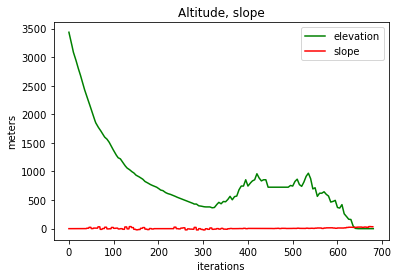

In [58]:
# Make a line graph of the altitude and slope for each iteration
plt.plot(path1,color="green",label="elevation")
plt.plot(slope1,color="red",label="slope")
plt.title("Altitude, slope")
plt.xlabel("iterations")
plt.ylabel("meters")
plt.legend()
plt.show()  

# Problem 6
Change of initial value

In [59]:
alpha = 0.2
point=142
path2 = going_down_fuji(point,alpha)
print("Lenght of the locations list:",len(path2))

Lenght of the locations list: 711


In [60]:
elev2 = np.concatenate((np.reshape(np.arange(0,711,1),(711,1)),np.reshape(path2[::-1],(711,1))),axis=1)
slope2 = []
for i in range(1,len(elev2)):
    slope2.append(compute_slope(i,elev2))

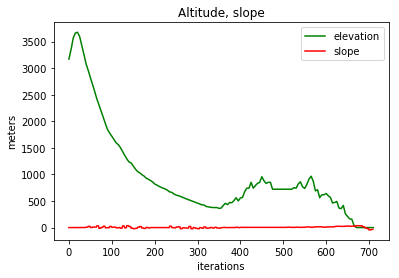

In [61]:
# Make a line graph of the altitude and slope for each iteration
plt.plot(path2,color="green",label="elevation")
plt.plot(slope2,color="red",label="slope")
plt.title("Altitude, slope")
plt.xlabel("iterations")
plt.ylabel("meters")
plt.legend()
plt.show() 

# Problem 7
Change hyperparameters

In [62]:
# change from 0.2 to 0.5
alpha1 = 0.5
point=142
path3 = going_down_fuji(point,alpha1)
print("Lenght of the locations list:",len(path3))

Lenght of the locations list: 285


In [63]:
elev3 = np.concatenate((np.reshape(np.arange(0,285,1),(285,1)),np.reshape(path3[::-1],(285,1))),axis=1)
slope3 = []
for i in range(1,len(elev3)):
    slope3.append(compute_slope(i,elev3))

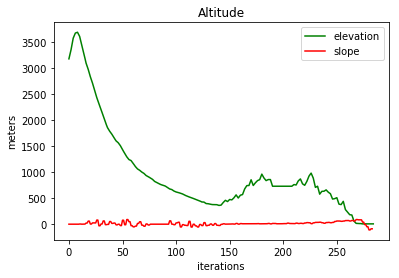

In [65]:
# Make a line graph of the altitude and slope for each iteration
# used previous variable from function in Problem 2 to compute all slopes for points in Fuji data and take first 136 points
plt.plot(path3,color="green",label="elevation")
plt.plot(slope3,color="red",label="slope")
plt.title("Altitude")
plt.xlabel("iterations")
plt.ylabel("meters")
plt.legend()
plt.show() 